In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [10]:
 #reading the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# getting their shapes
print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (54808, 15)
Shape of test : (23490, 14)


# Data Analysis

In [11]:
train.head()

,Unnamed: 0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [12]:
test.head()

,Unnamed: 0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [13]:
train.shape

test.shape

(23490, 14)

In [14]:
train.columns

Index(['Unnamed: 0', 'employee_id', 'department', 'region', 'education',
       'gender', 'recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [15]:
test.columns

Index(['Unnamed: 0', 'employee_id', 'department', 'region', 'education',
       'gender', 'recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score'],
      dtype='object')

In [16]:
# describing the training set

train.describe()

,Unnamed: 0,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,27403.500000,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,15821.851114,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,0.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,13701.750000,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,27403.500000,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,41105.250000,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,54807.000000,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [17]:
# describing the test set

test.describe()

,Unnamed: 0,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,11744.500000,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,6781.123248,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,0.000000,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,5872.250000,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,11744.500000,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,17616.750000,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,23489.000000,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [18]:
train.info() ## Information of training datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            54808 non-null  int64  
 1   employee_id           54808 non-null  int64  
 2   department            54808 non-null  object 
 3   region                54808 non-null  object 
 4   education             52399 non-null  object 
 5   gender                54808 non-null  object 
 6   recruitment_channel   54808 non-null  object 
 7   no_of_trainings       54808 non-null  int64  
 8   age                   54808 non-null  int64  
 9   previous_year_rating  50684 non-null  float64
 10  length_of_service     54808 non-null  int64  
 11  KPIs_met >80%         54808 non-null  int64  
 12  awards_won?           54808 non-null  int64  
 13  avg_training_score    54808 non-null  int64  
 14  is_promoted           54808 non-null  int64  
dtypes: float64(1), int6

In [19]:
# checking if there is any NULL value in the dataset

train.isnull().sum()

Unnamed: 0                 0
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<AxesSubplot:>

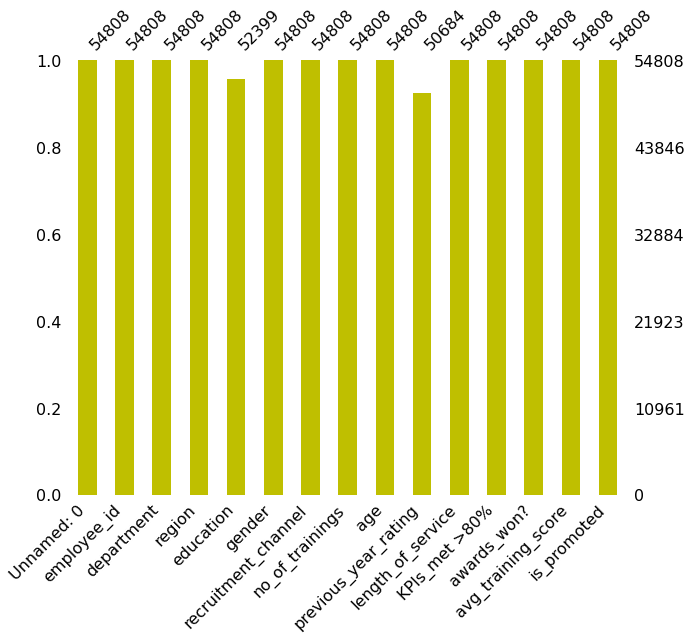

In [20]:
#### Visualizing the null values using missingo function

import missingno as msno
msno.bar(train, color = 'y', figsize = (10,8))  #### Check the missing values in test data

In [21]:
test.isnull().sum()

Unnamed: 0                 0
employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

<AxesSubplot:>

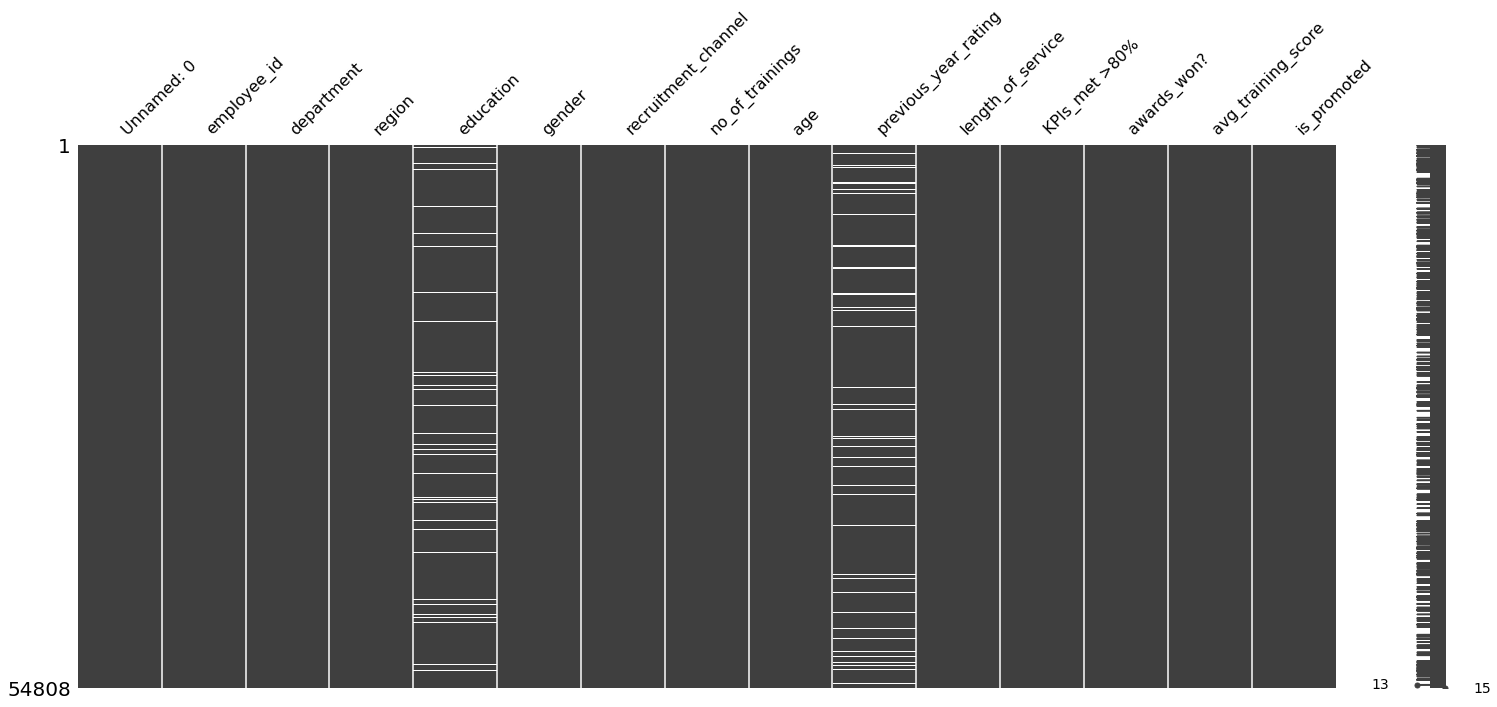

In [22]:
#### Visualizing the null values using missingo function

import missingno as msno
msno.matrix(train)
  #### Check the missing values in test data

# Exploratory Data Analysis

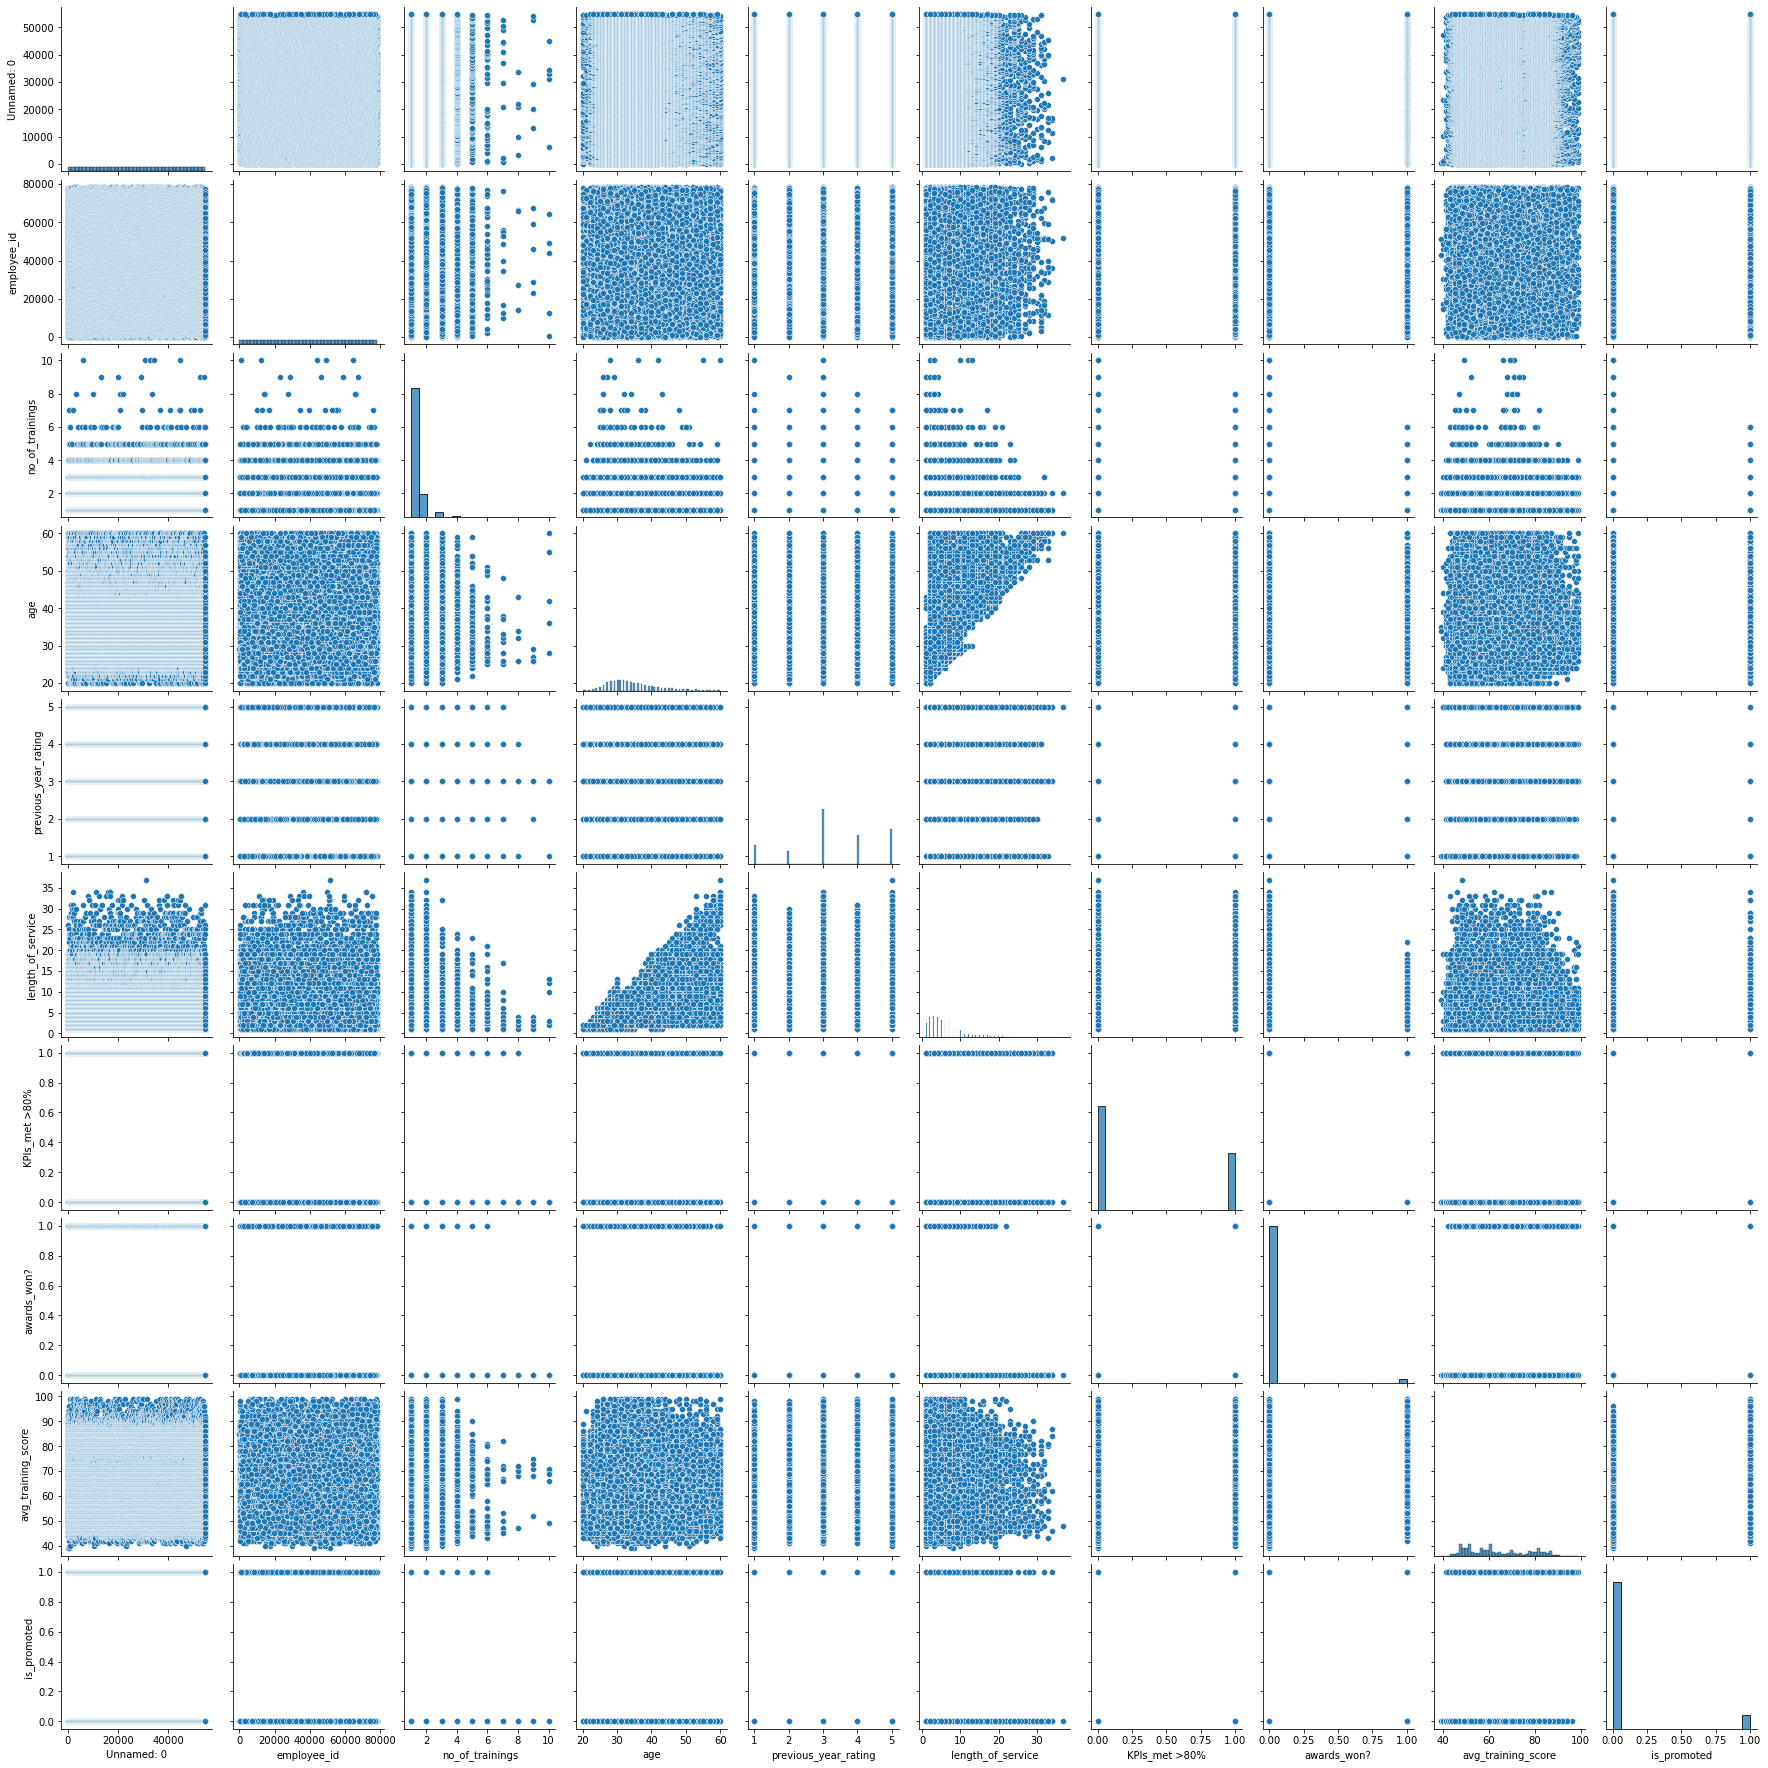

In [24]:
import seaborn as sns
### Pairplot using seaborn library
sns.pairplot(train)

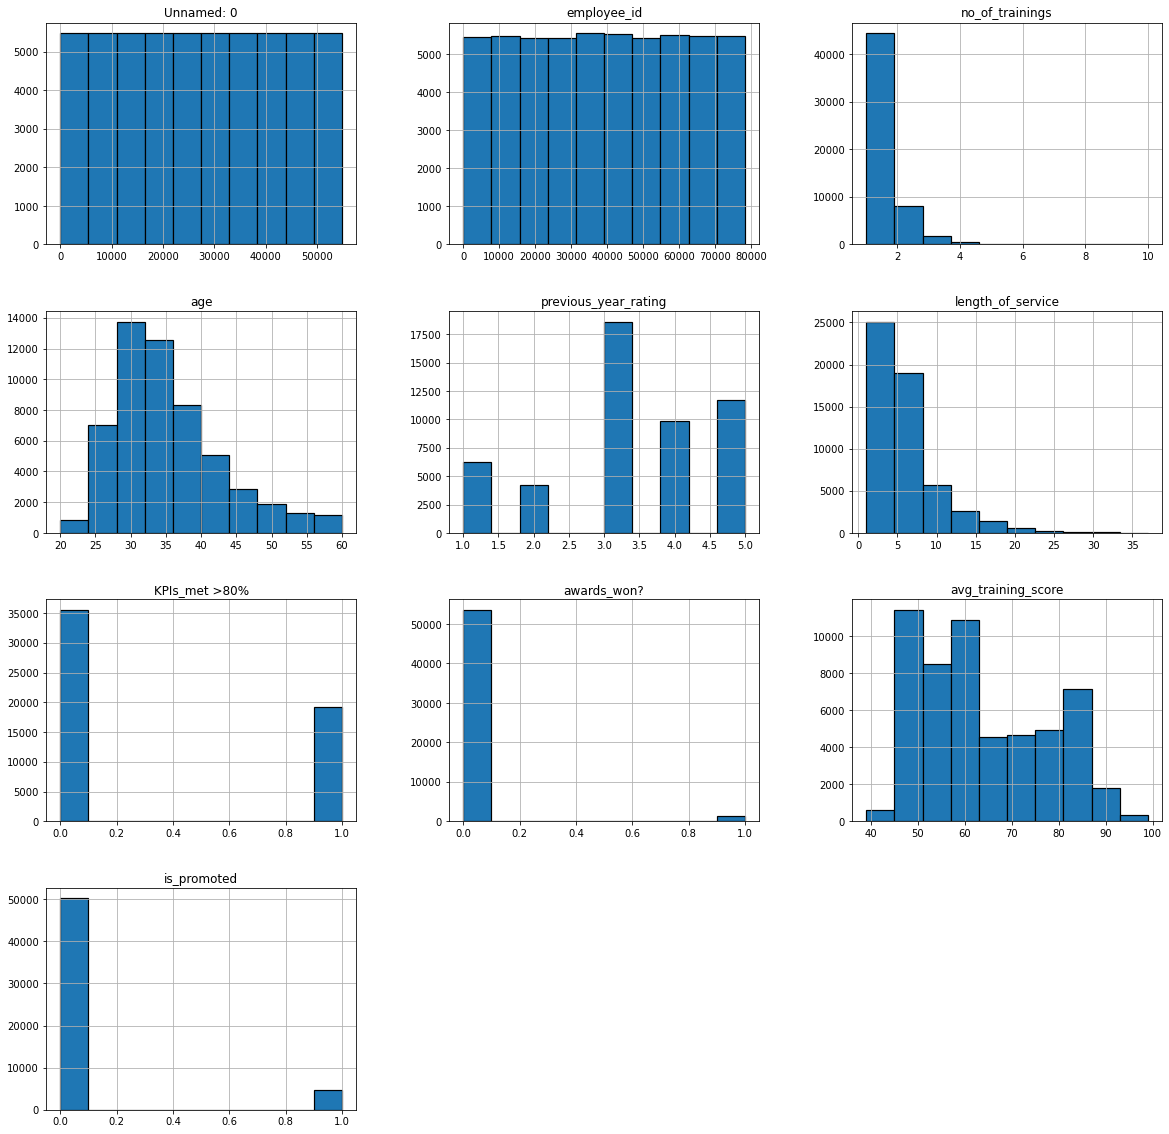

In [25]:
# Visulazing the distibution of the data for every feature
train.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));


<AxesSubplot:>

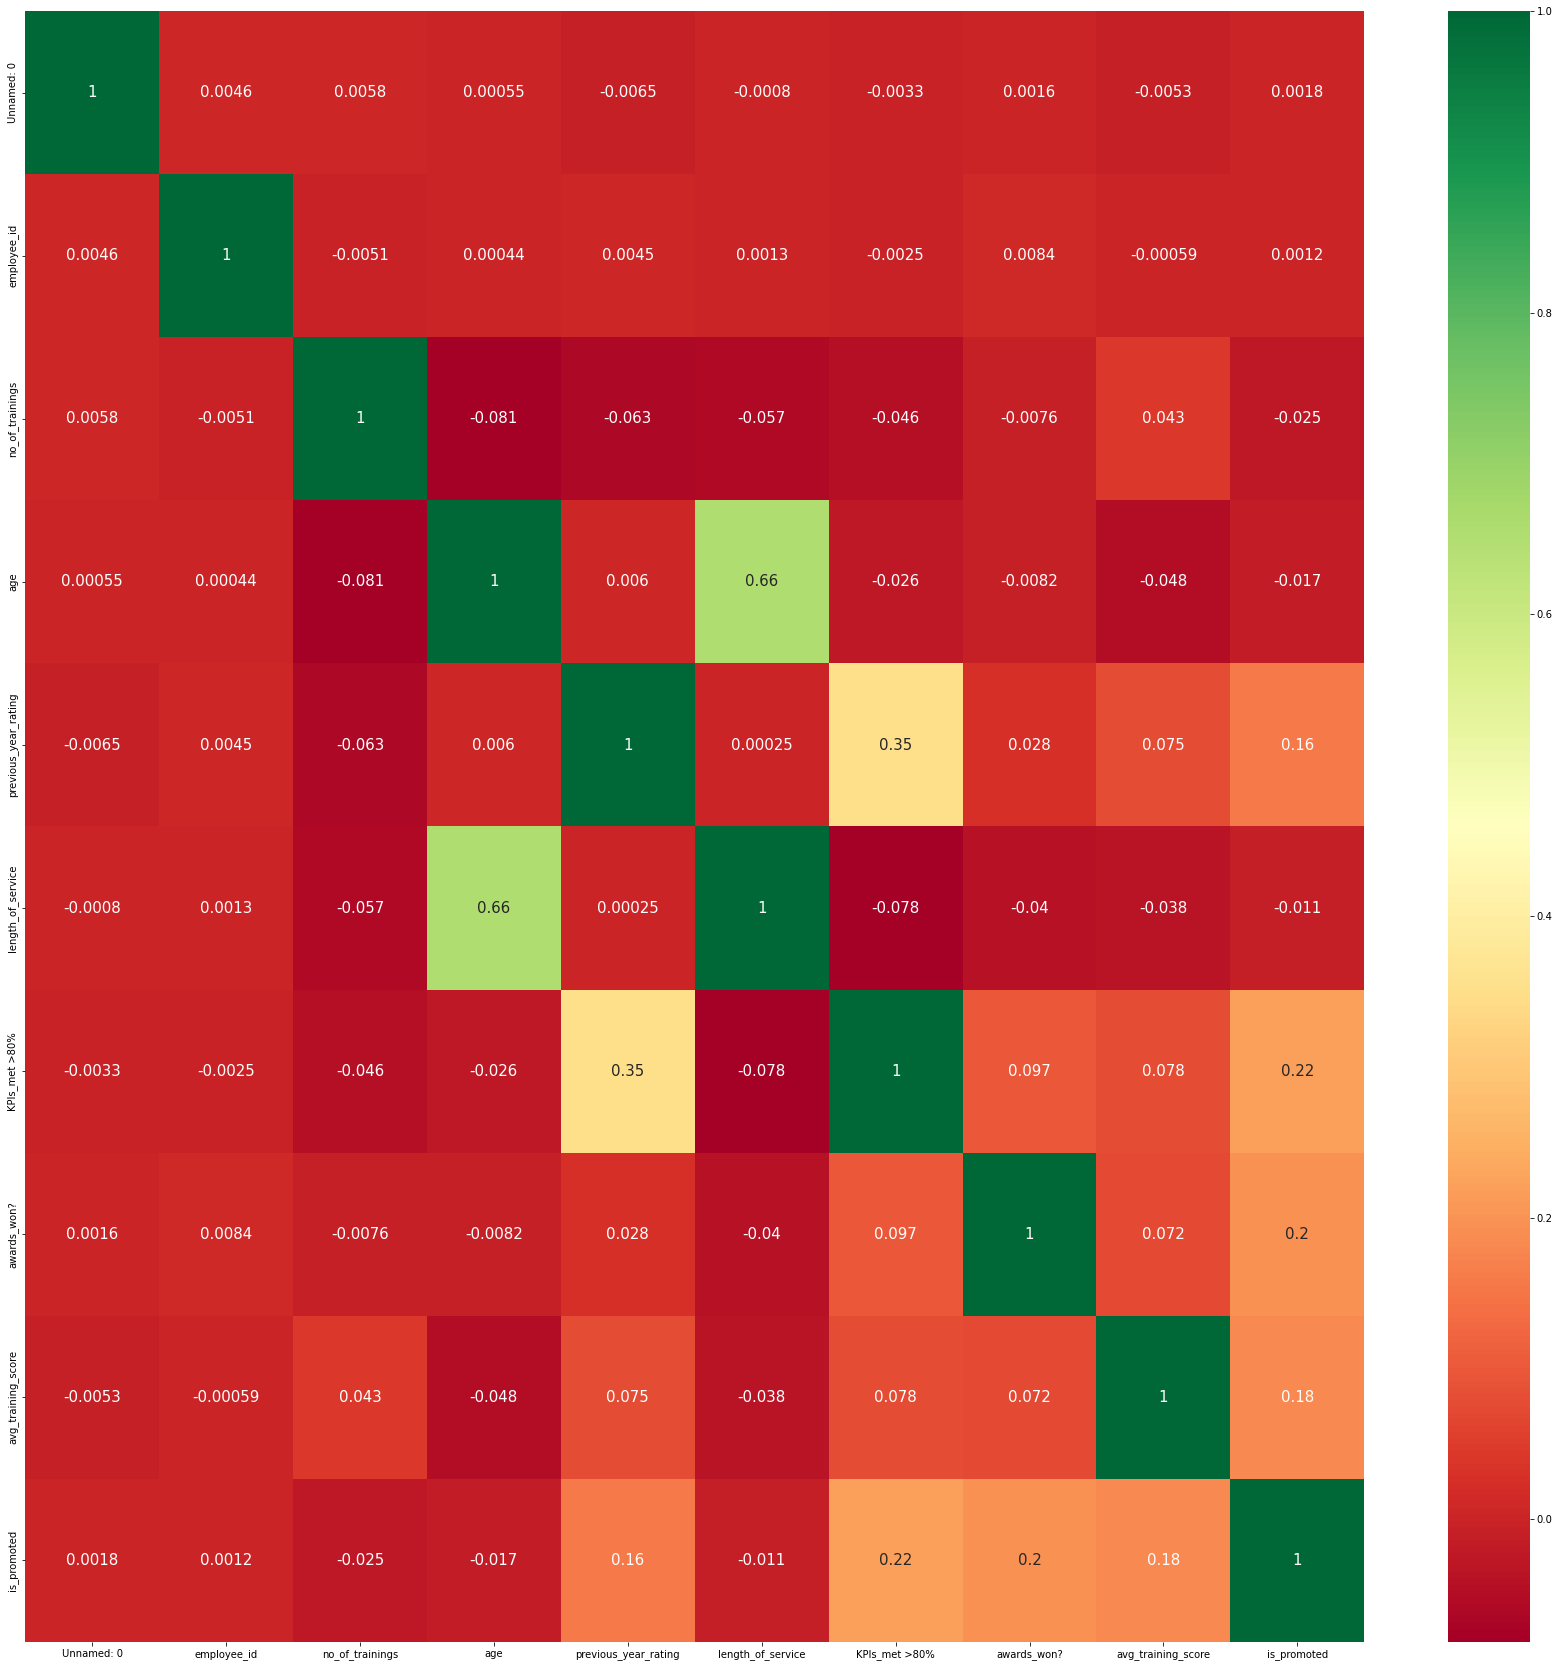

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [29]:
train.head()

,Unnamed: 0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [30]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

# HR Analysis

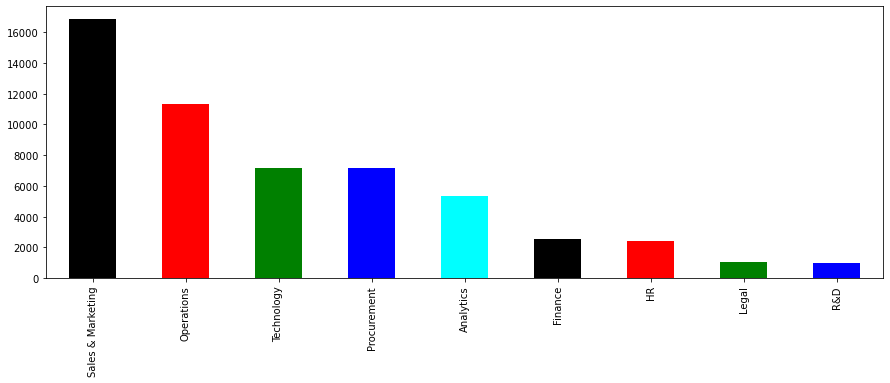

In [31]:
# visualizing the different groups in the dataset
plt.subplots(figsize=(15,5))
train['department'].value_counts(normalize = True)
train['department'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

In [32]:
train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


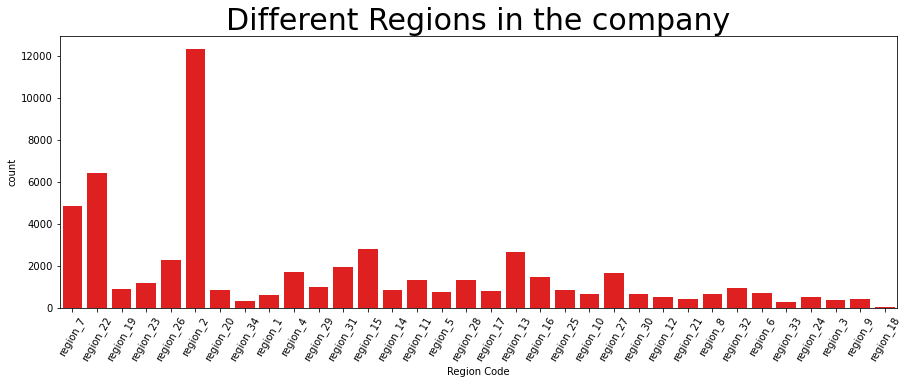

In [33]:
# checking the different regions of the company
plt.subplots(figsize=(15,5))
sns.countplot(train['region'], color = 'red')
plt.title('Different Regions in the company', fontsize = 30)
plt.xticks(rotation = 60)
plt.xlabel('Region Code')
plt.ylabel('count')
plt.show()

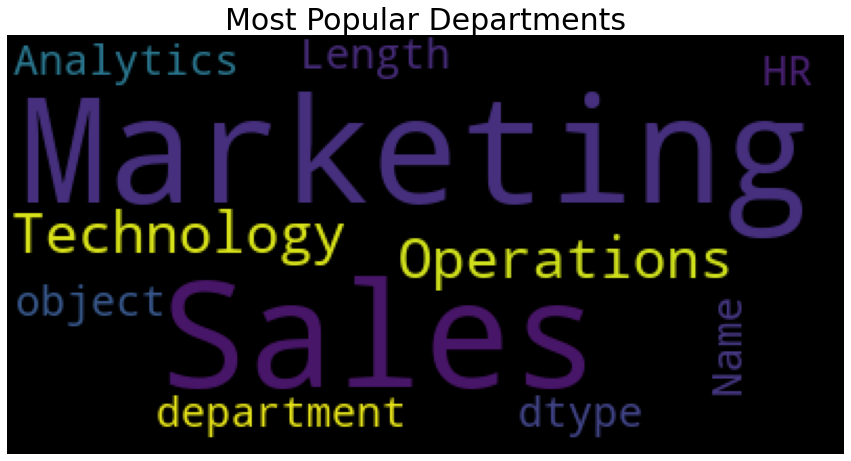

In [34]:
 #### Check most popular department
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopword).generate(str(train['department']))

plt.rcParams['figure.figsize'] = (15, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Departments', fontsize = 30)
plt.axis('off')
plt.show()

In [35]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

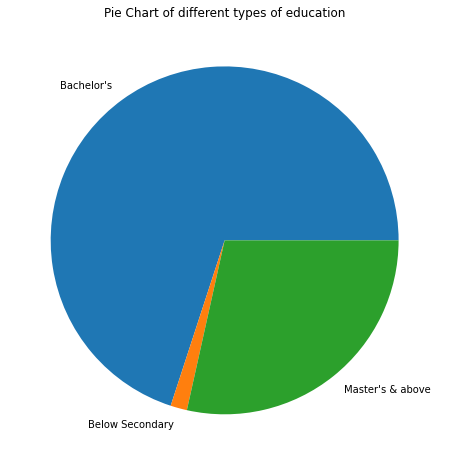

In [36]:
# Prepare Data
df = train.groupby('education').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(15, 8))
plt.title("Pie Chart of different types of education")
plt.ylabel("")
plt.show()

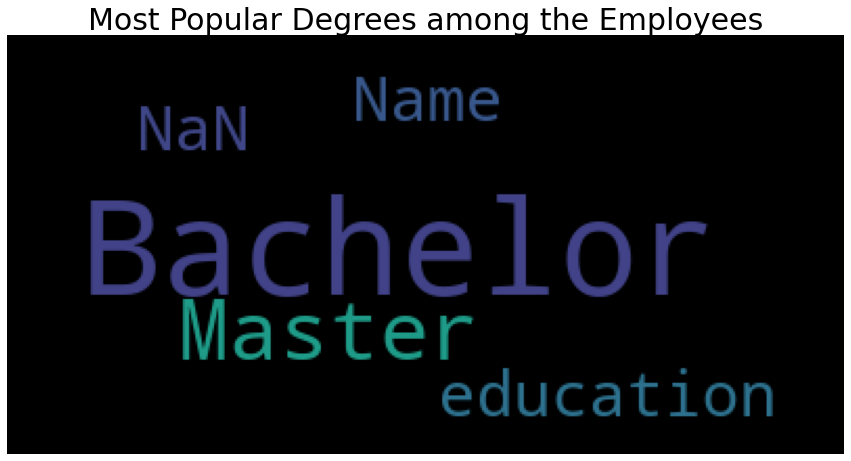

In [37]:
# most popular education degree among the employees

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopword, max_words = 5).generate(str(train['education']))

plt.rcParams['figure.figsize'] = (15, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Degrees among the Employees', fontsize = 30)
plt.axis('off')
plt.show()

In [38]:
# checking the gender gap

train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

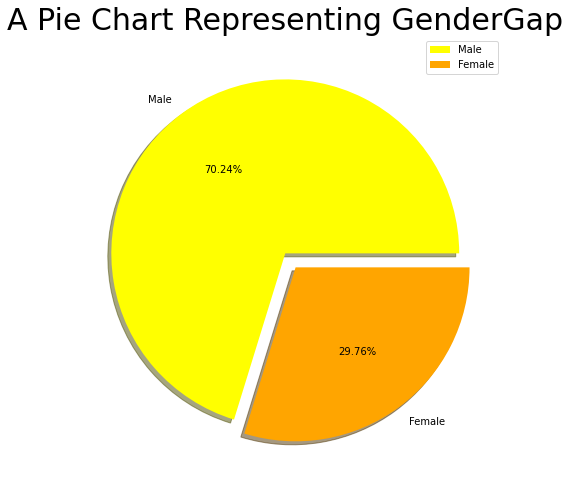

In [39]:
# plotting a pie chart

size = [38496, 16312]
labels = "Male", "Female"
colors = ['yellow', 'orange']
explode = [0, 0.1]

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing GenderGap', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

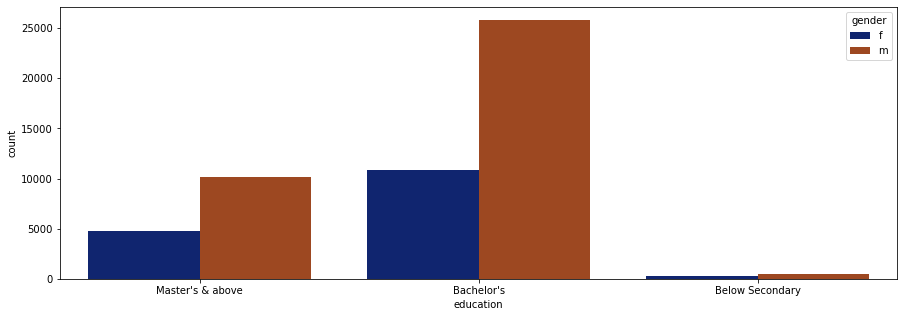

In [40]:
# comparison of permoted gender male & female
plt.subplots(figsize=(15,5))
sns.countplot(x = 'education', data = train, hue = 'gender', palette = 'dark')
plt.show()

In [42]:
#checking the different types of recruitment channels for the company

train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

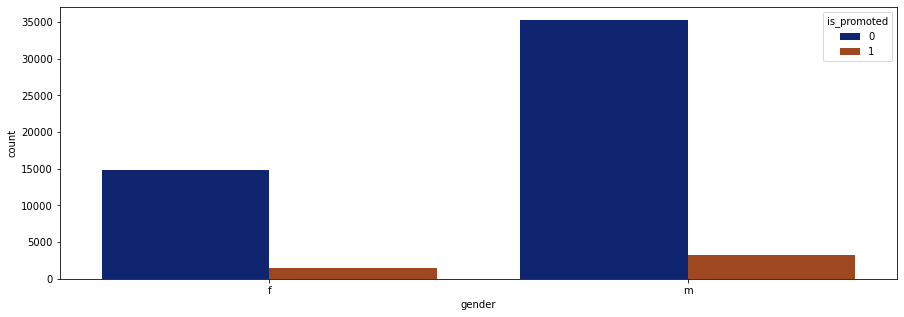

In [43]:
# comparison of permoted gender male & female
plt.subplots(figsize=(15,5))
sns.countplot(x = 'gender', data = train, hue = 'is_promoted', palette = 'dark')
plt.show()

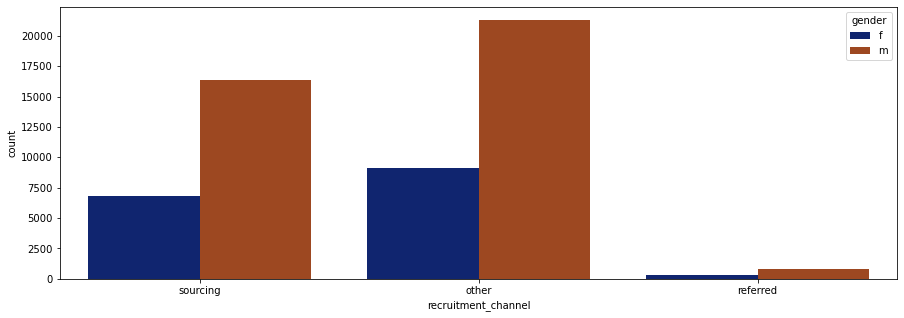

In [44]:
# comparison of recruitment_channel &  gender male & female
plt.subplots(figsize=(15,5))
sns.countplot(x = 'recruitment_channel', data = train, hue = 'gender', palette = 'dark')
plt.show()

In [45]:
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

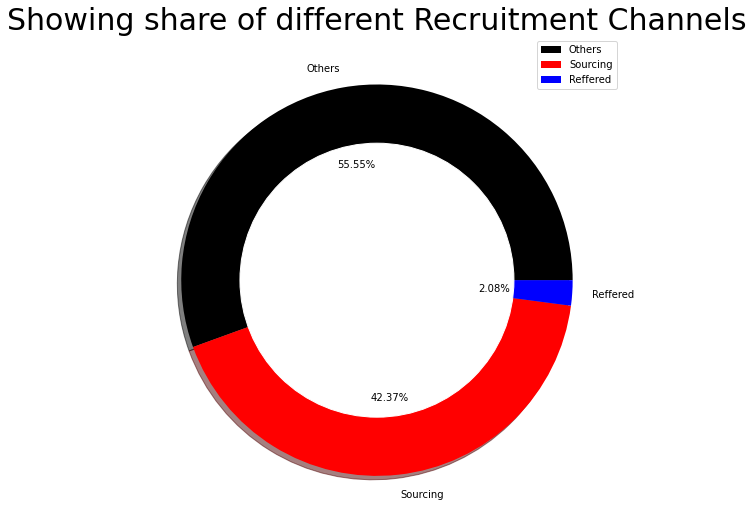

In [46]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [30446, 23220, 1142]
colors = ['black', 'red', 'blue']
labels = "Others", "Sourcing", "Reffered"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Age of Employees')

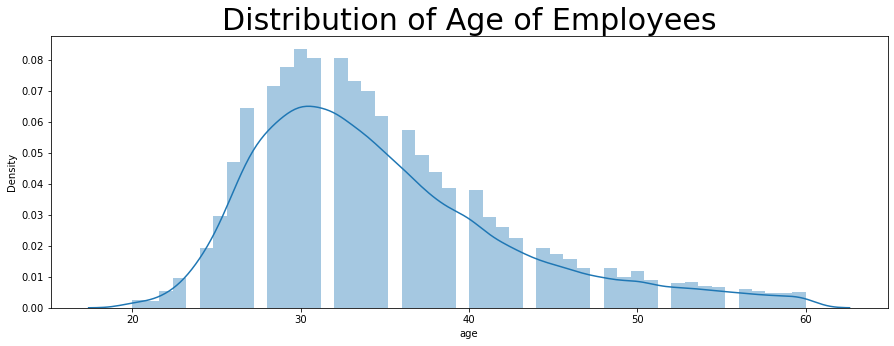

In [47]:
plt.subplots(figsize=(15,5))
sns.distplot(train['age'])
plt.title('Distribution of Age of Employees', fontsize = 30)

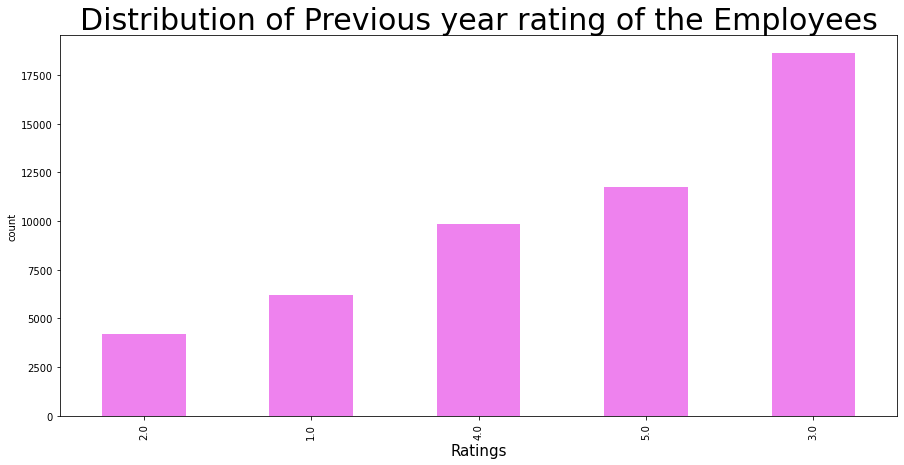

In [48]:
train['previous_year_rating'].value_counts().sort_values().plot.bar(color = 'violet', figsize = (15, 7))
plt.title('Distribution of Previous year rating of the Employees', fontsize = 30)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


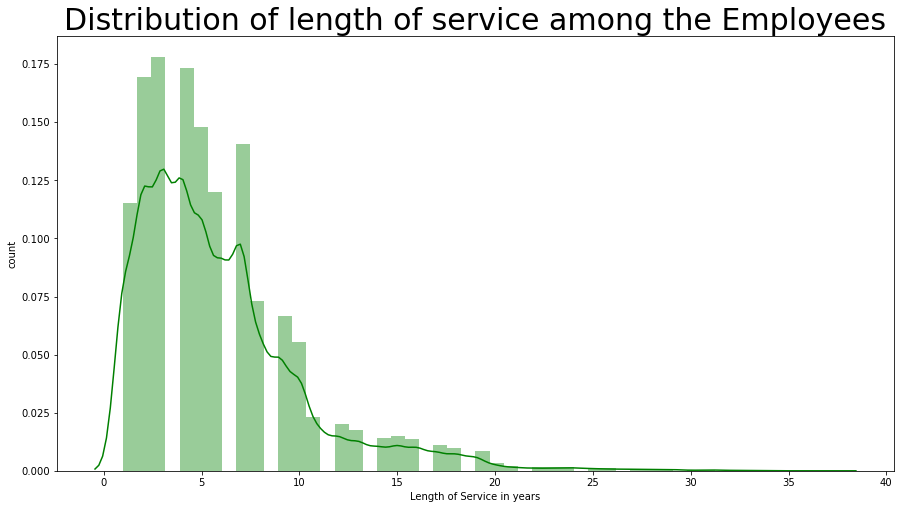

In [49]:
# checking the distribution of length of service
plt.subplots(figsize=(15,8))
sns.distplot(train['length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years')
plt.ylabel('count')
plt.show()

In [50]:
train.head()

,Unnamed: 0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [51]:
train['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

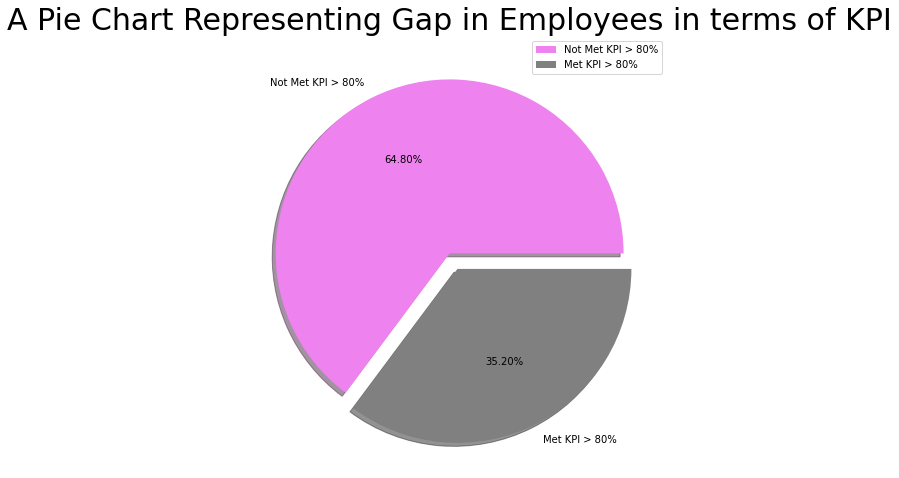

In [52]:
# plotting a pie chart


size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
colors = ['violet', 'grey']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [53]:
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

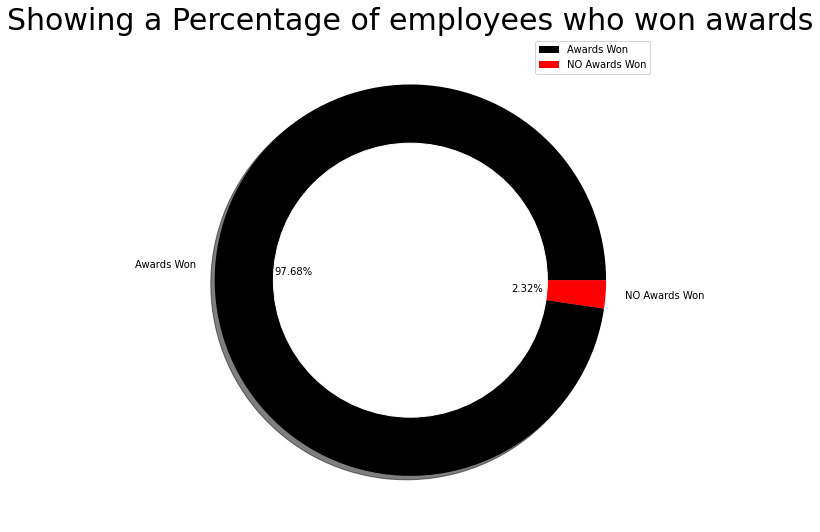

In [54]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [53538, 1270]
colors = ['black', 'red']
labels = "Awards Won", "NO Awards Won"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing a Percentage of employees who won awards', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


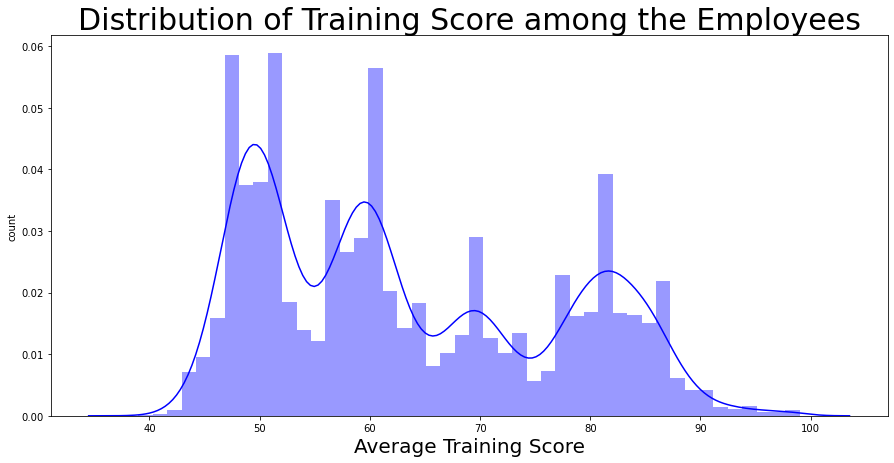

In [55]:
# checking the distribution of the avg_training score of the Employees

plt.subplots(figsize=(15,7))
sns.distplot(train['avg_training_score'], color = 'blue')
plt.title('Distribution of Training Score among the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

In [56]:
# checkig the no. of Employees Promoted

train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [57]:
# finding the %age of people promoted

promoted = (4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


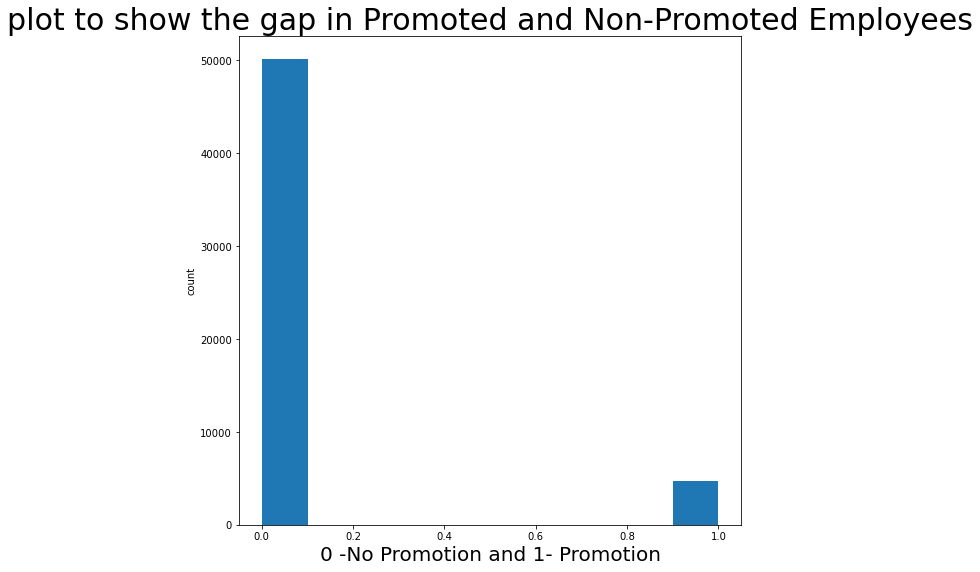

In [58]:
#plotting a hist plot 

plt.hist(train['is_promoted'])
plt.title('plot to show the gap in Promoted and Non-Promoted Employees', fontsize = 30)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 20)
plt.ylabel('count')
plt.show()

# Bi-varaiate Data Visualization

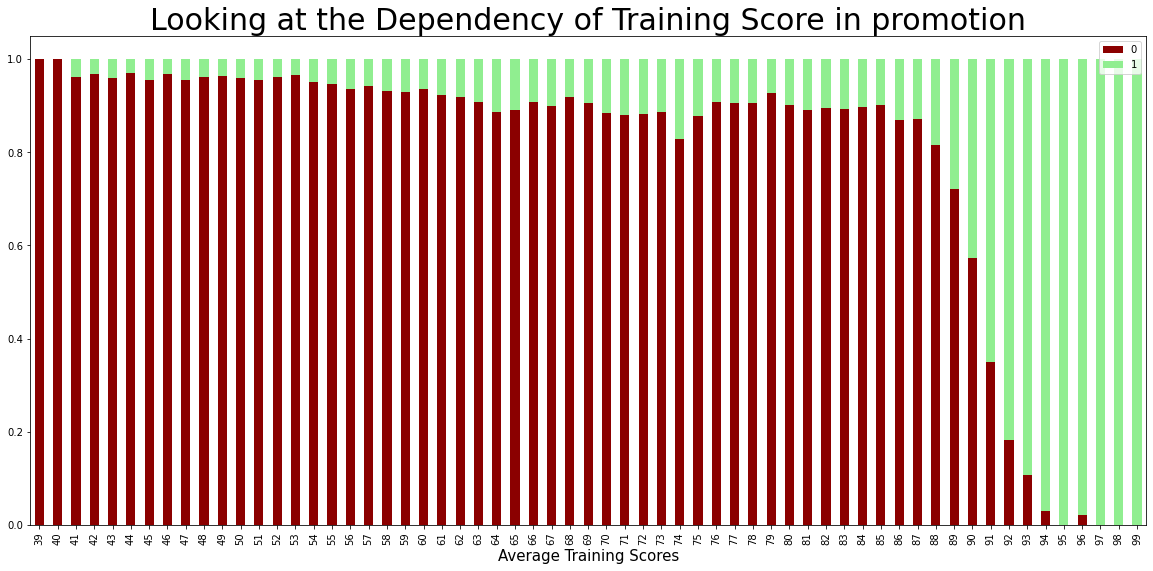

In [59]:
# scatter plot between average training score and is_promoted

data = pd.crosstab(train['avg_training_score'], train['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])

plt.title('Looking at the Dependency of Training Score in promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()


# As, the Training Scores Increases, the chances of Promotion Increases Highly

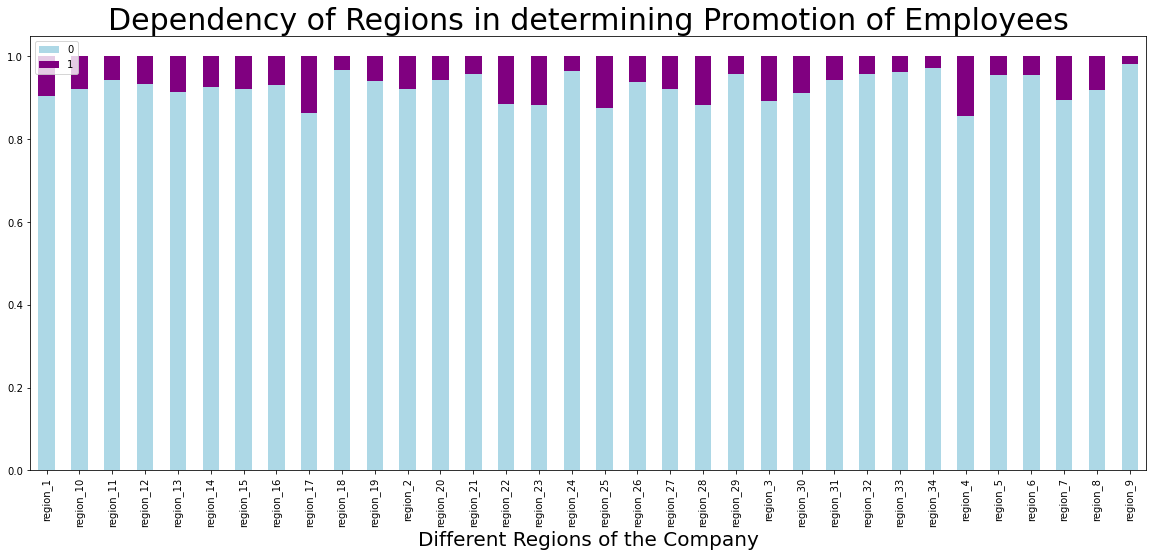

In [60]:
# checking dependency of different regions in promotion

data = pd.crosstab(train['region'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'purple'])

plt.title('Dependency of Regions in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Regions of the Company', fontsize = 20)
plt.legend()
plt.show()

The above graph shows that there is no biasedness over regions in terms of Promotion as all the regions share promotions almost equally.

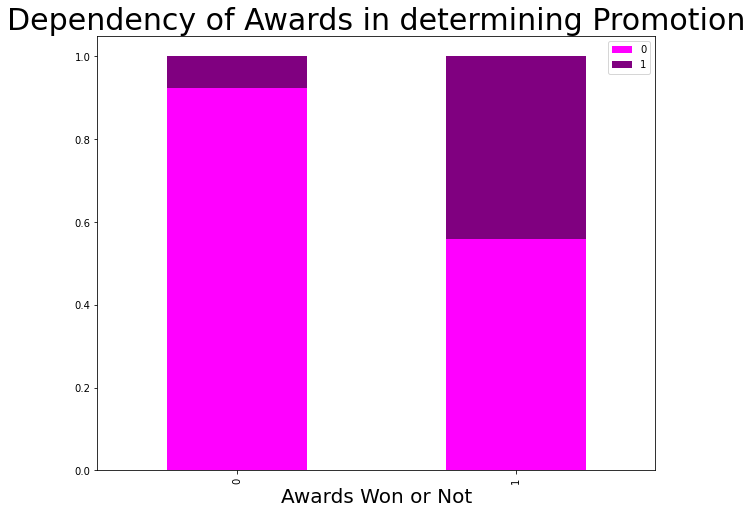

In [61]:
# dependency of awards won on promotion

data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

# There is a very good chance of getting promoted if the employee has won an award

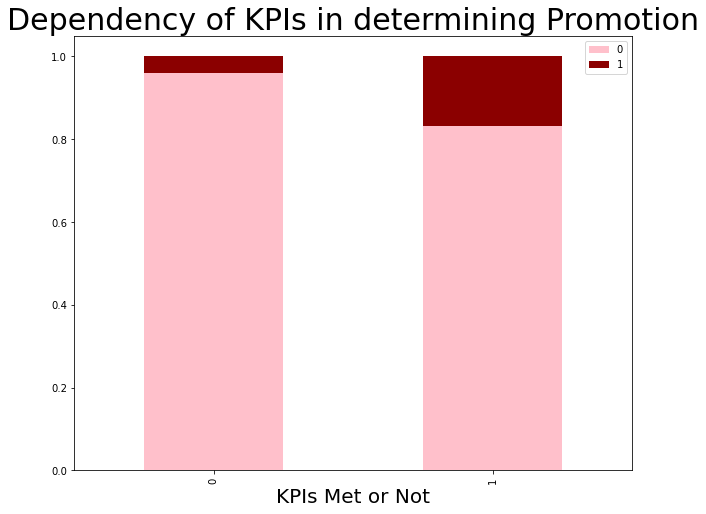

In [62]:
#dependency of KPIs with Promotion

data = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion', fontsize = 30)
plt.xlabel('KPIs Met or Not', fontsize = 20)
plt.legend()
plt.show()

Again Having a good KPI score increases the chances of getting promoted in the company.

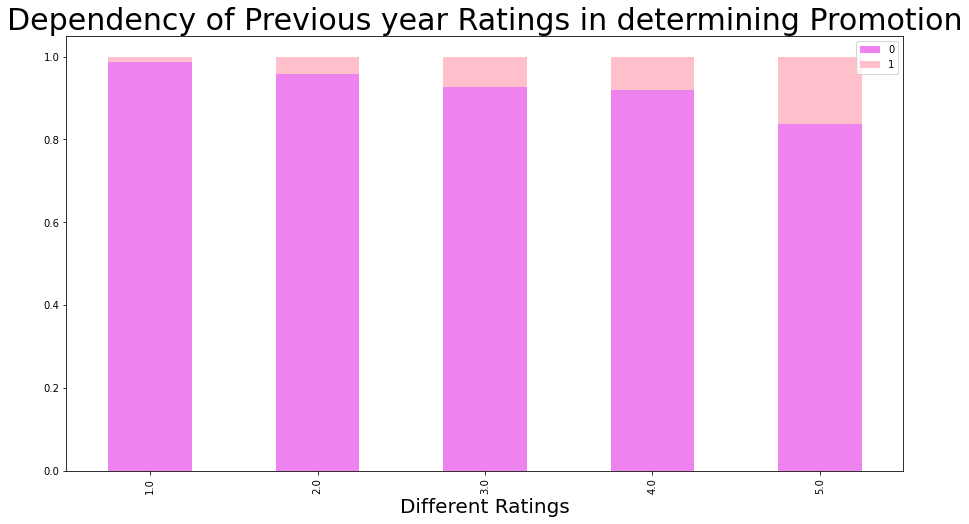

In [63]:
# checking dependency on previous years' ratings

data = pd.crosstab(train['previous_year_rating'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['violet', 'pink'])

plt.title('Dependency of Previous year Ratings in determining Promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()

### The Above Graph clearly suggests that previous ratings matter a lot, if the ratings are high, the chances of being promoted in the company increases and there is completely no promotion for the employees with previous year ratings = 0

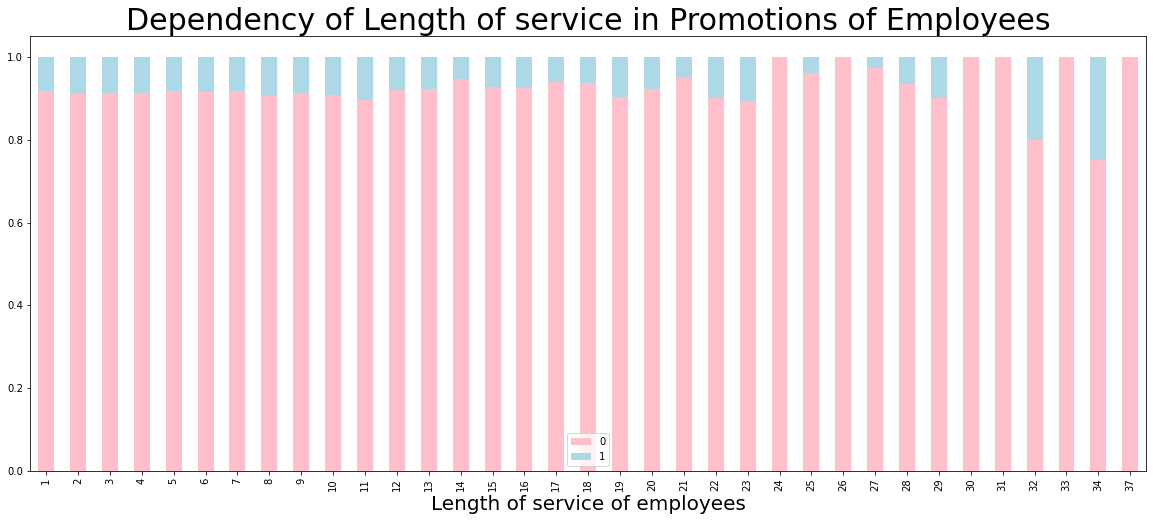

In [64]:
# checking how length of service determines the promotion of employees

data = pd.crosstab(train['length_of_service'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['pink', 'lightblue'])

plt.title('Dependency of Length of service in Promotions of Employees', fontsize = 30)
plt.xlabel('Length of service of employees', fontsize = 20)
plt.legend()
plt.show()

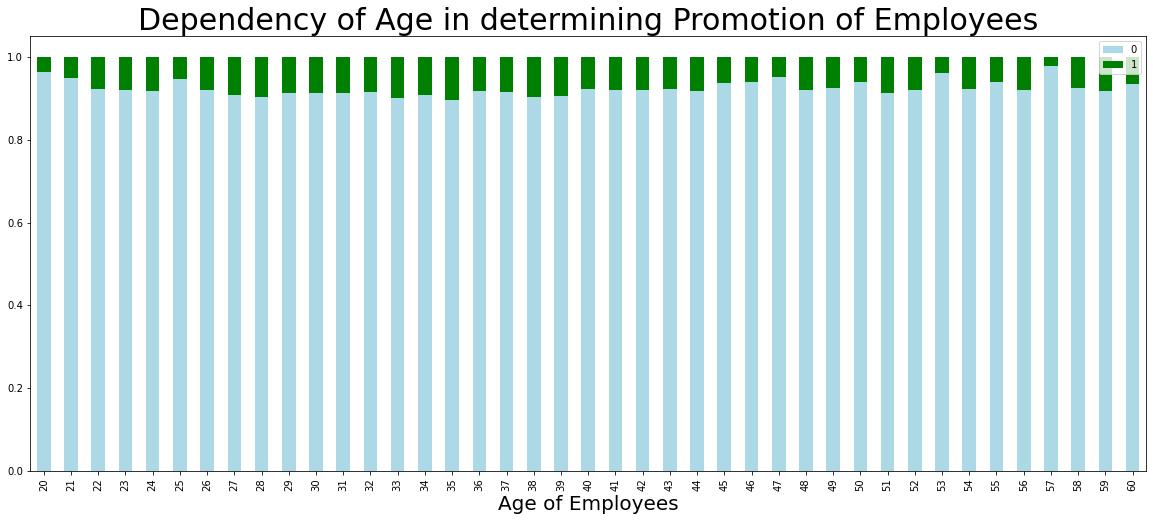

In [65]:
# checking dependency of age factor in promotion of employees

data = pd.crosstab(train['age'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

### This is Very Impressive that the company promotes employees of all the ages equally even the freshers have equal share of promotion and also the senior citizen employees are getting the equal share of Promotion in the Company

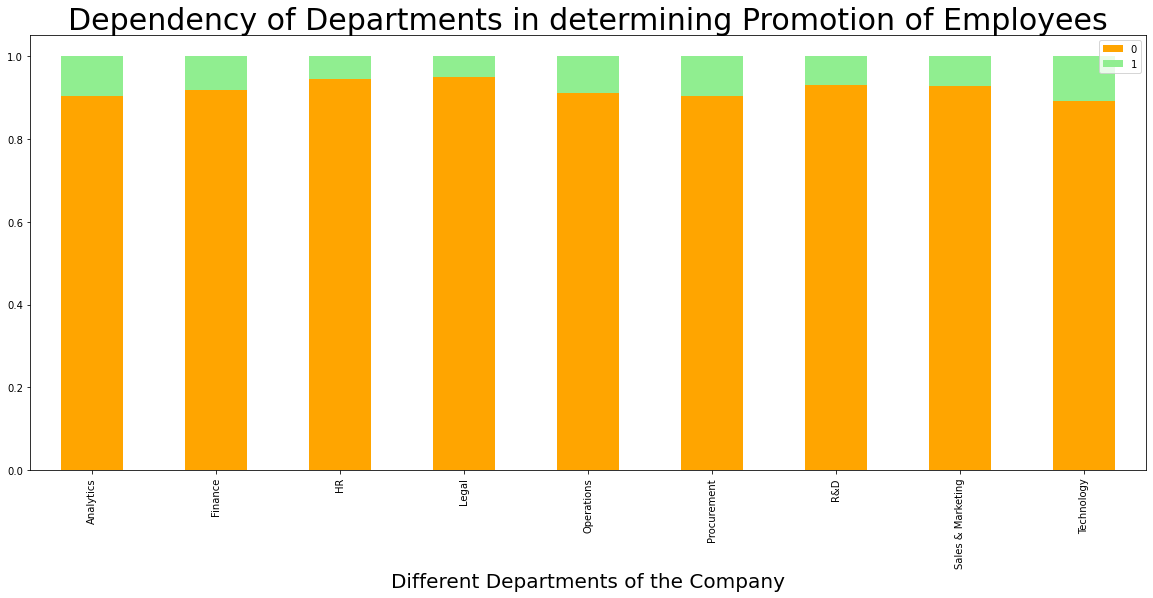

In [66]:
# checking which department got most number of promotions

data = pd.crosstab(train['department'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'lightgreen'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

## Again, Each of the departments have equal no. of promotions showing an equal developement in each of the departments of the company.

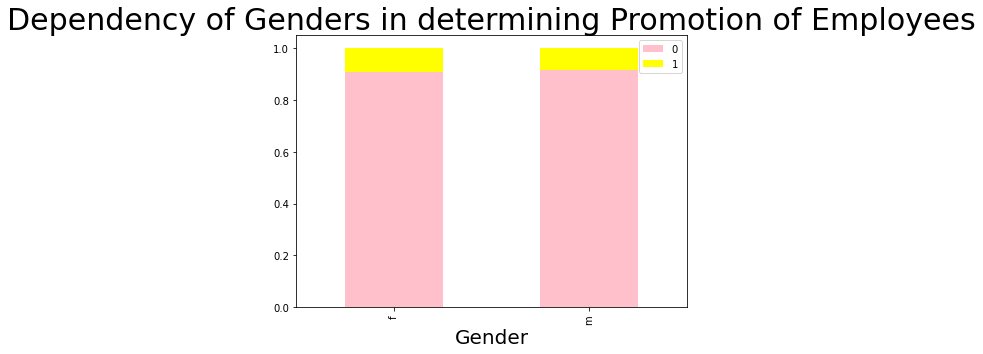

In [67]:
# checking dependency of gender over promotion

data = pd.crosstab(train['gender'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['pink', 'yellow'])

plt.title('Dependency of Genders in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()
plt.show()

### The above plot shows that there is no partiality between males and females in terms of promotion

In [68]:
train.head()

,Unnamed: 0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [69]:
train.isnull().sum()

Unnamed: 0                 0
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

## Data Pre-processing

In [70]:
# filling missing values

train['education'].fillna(train['education'].mode()[0], inplace = True)
train['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
train.isnull().sum().sum()

0

In [71]:
# filling missing values

test['education'].fillna(test['education'].mode()[0], inplace = True)
test['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
test.isnull().sum().sum()

0

In [72]:
# removing the employee_id column

train = train.drop(['employee_id'], axis = 1)

train.columns

Index(['Unnamed: 0', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [73]:
# saving the employee_id

emp_id = test['employee_id']

# removing the employee_id column

test = test.drop(['employee_id'], axis = 1)

test.columns

Index(['Unnamed: 0', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [74]:
# defining the test set

x_test = test

x_test.columns

Index(['Unnamed: 0', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [75]:
# one hot encoding for the test set

x_test = pd.get_dummies(x_test)

x_test.columns

Index(['Unnamed: 0', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       're

In [76]:
# splitting the train set into dependent and independent sets

x = train.iloc[:, :-1]
y = train.iloc[:, -1]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (54808, 13)
Shape of y: (54808,)


In [77]:
# one hot encoding for the train set

x = pd.get_dummies(x)

x.columns

Index(['Unnamed: 0', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       're

In [ ]:
Oversampling of the Model

In [81]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (100280, 59)
Size of y-sample : (100280, 1)


In [82]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (80224, 59)
Shape of x_valid:  (20056, 59)
Shape of y_train:  (80224, 1)
Shape of y_valid:  (20056, 1)


In [83]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)
x_valid = sc.transform(x_valid)

In [84]:
# applying pca

'''
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_valid = pca.transform(x_valid)

'''

'\nfrom sklearn.decomposition import PCA\n\npca = PCA(n_components = None)\nx_train = pca.fit_transform(x_train)\nx_test = pca.transform(x_test)\nx_valid = pca.transform(x_valid)\n\n'

## Modelling

### Random Forest Classifer

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))

'''
print("Validation Accuracy :", rfc.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, rfc_pred)
print(cm)

cr = classification_report(y_valid, rfc_pred)
print(cr)

apc = average_precision_score(y_valid, rfc_pred)
print("Average Precision Score :", apc)
'''

C:\Users\DELL\AppData\Local\Temp/ipykernel_47788/274386551.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


Training Accuracy : 1.0


'\nprint("Validation Accuracy :", rfc.score(x_valid, y_valid))\n\ncm = confusion_matrix(y_valid, rfc_pred)\nprint(cm)\n\ncr = classification_report(y_valid, rfc_pred)\nprint(cr)\n\napc = average_precision_score(y_valid, rfc_pred)\nprint("Average Precision Score :", apc)\n'

### Xg-Boost Classifier

In [86]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

print("Training Accuracy :", xgb.score(x_train, y_train))
'''
print("Validation Accuracy :", xgb.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, xgb_pred)
print(cm)

cr = classification_report(y_valid, xgb_pred)
print(cr)

apc = average_precision_score(y_valid, xgb_pred)
print("Average Precision Score :", apc)
'''

Training Accuracy : 0.9695353011567611


'\nprint("Validation Accuracy :", xgb.score(x_valid, y_valid))\n\ncm = confusion_matrix(y_valid, xgb_pred)\nprint(cm)\n\ncr = classification_report(y_valid, xgb_pred)\nprint(cr)\n\napc = average_precision_score(y_valid, xgb_pred)\nprint("Average Precision Score :", apc)\n'

### Extra Trees Classifier

In [88]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

etc_pred = etc.predict(x_test)

print("Training Accuracy :", etc.score(x_train, y_train))
'''
print("Validation Accuracy :", etc.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, etc_pred)
print(cm)

cr = classification_report(y_valid, etc_pred)
print(cr)

apc = average_precision_score(y_valid, etc_pred)
print("Average Precision Score :", apc)
'''

C:\Users\DELL\AppData\Local\Temp/ipykernel_47788/3794549080.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etc.fit(x_train, y_train)


Training Accuracy : 1.0


'\nprint("Validation Accuracy :", etc.score(x_valid, y_valid))\n\ncm = confusion_matrix(y_valid, etc_pred)\nprint(cm)\n\ncr = classification_report(y_valid, etc_pred)\nprint(cr)\n\napc = average_precision_score(y_valid, etc_pred)\nprint("Average Precision Score :", apc)\n'

### Cat Boost Classifier

In [89]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(learning_rate = 0.004, early_stopping_rounds = 100)
cbc.fit(x_train, y_train)

cbc_pred = cbc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))
'''
print("Validation Accuracy :", rfc.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, cbc_pred)
print(cm)

cr = classification_report(y_valid, cbc_pred)
print(cr)

apc = average_precision_score(y_valid, cbc_pred)
print("Average Precision Score :", apc)
'''

0:	learn: 0.6880561	total: 210ms	remaining: 3m 30s
1:	learn: 0.6831143	total: 250ms	remaining: 2m 4s
2:	learn: 0.6782189	total: 279ms	remaining: 1m 32s
3:	learn: 0.6735176	total: 307ms	remaining: 1m 16s
4:	learn: 0.6689015	total: 334ms	remaining: 1m 6s
5:	learn: 0.6644059	total: 364ms	remaining: 1m
6:	learn: 0.6599443	total: 388ms	remaining: 55.1s
7:	learn: 0.6556376	total: 409ms	remaining: 50.7s
8:	learn: 0.6512196	total: 433ms	remaining: 47.7s
9:	learn: 0.6469694	total: 456ms	remaining: 45.1s
10:	learn: 0.6428045	total: 481ms	remaining: 43.3s
11:	learn: 0.6386338	total: 509ms	remaining: 41.9s
12:	learn: 0.6345268	total: 542ms	remaining: 41.2s
13:	learn: 0.6304819	total: 582ms	remaining: 41s
14:	learn: 0.6266273	total: 612ms	remaining: 40.2s
15:	learn: 0.6228546	total: 654ms	remaining: 40.2s
16:	learn: 0.6199483	total: 680ms	remaining: 39.3s
17:	learn: 0.6170252	total: 717ms	remaining: 39.1s
18:	learn: 0.6134184	total: 748ms	remaining: 38.6s
19:	learn: 0.6115728	total: 785ms	remaining

163:	learn: 0.3671183	total: 4.14s	remaining: 21.1s
164:	learn: 0.3664367	total: 4.16s	remaining: 21.1s
165:	learn: 0.3658341	total: 4.19s	remaining: 21.1s
166:	learn: 0.3646924	total: 4.22s	remaining: 21.1s
167:	learn: 0.3632880	total: 4.25s	remaining: 21.1s
168:	learn: 0.3623557	total: 4.28s	remaining: 21s
169:	learn: 0.3615981	total: 4.3s	remaining: 21s
170:	learn: 0.3605659	total: 4.33s	remaining: 21s
171:	learn: 0.3592420	total: 4.35s	remaining: 20.9s
172:	learn: 0.3585194	total: 4.37s	remaining: 20.9s
173:	learn: 0.3568558	total: 4.38s	remaining: 20.8s
174:	learn: 0.3560109	total: 4.4s	remaining: 20.7s
175:	learn: 0.3543991	total: 4.42s	remaining: 20.7s
176:	learn: 0.3537593	total: 4.43s	remaining: 20.6s
177:	learn: 0.3522591	total: 4.46s	remaining: 20.6s
178:	learn: 0.3513772	total: 4.48s	remaining: 20.6s
179:	learn: 0.3507330	total: 4.51s	remaining: 20.5s
180:	learn: 0.3492710	total: 4.53s	remaining: 20.5s
181:	learn: 0.3486645	total: 4.55s	remaining: 20.5s
182:	learn: 0.347211

326:	learn: 0.2492022	total: 8.71s	remaining: 17.9s
327:	learn: 0.2489010	total: 8.76s	remaining: 17.9s
328:	learn: 0.2485272	total: 8.8s	remaining: 17.9s
329:	learn: 0.2482234	total: 8.82s	remaining: 17.9s
330:	learn: 0.2479267	total: 8.85s	remaining: 17.9s
331:	learn: 0.2475667	total: 8.88s	remaining: 17.9s
332:	learn: 0.2472708	total: 8.91s	remaining: 17.9s
333:	learn: 0.2469690	total: 8.95s	remaining: 17.8s
334:	learn: 0.2466663	total: 8.98s	remaining: 17.8s
335:	learn: 0.2464319	total: 9.02s	remaining: 17.8s
336:	learn: 0.2460251	total: 9.05s	remaining: 17.8s
337:	learn: 0.2457414	total: 9.09s	remaining: 17.8s
338:	learn: 0.2451760	total: 9.12s	remaining: 17.8s
339:	learn: 0.2446236	total: 9.15s	remaining: 17.8s
340:	learn: 0.2443442	total: 9.19s	remaining: 17.8s
341:	learn: 0.2440530	total: 9.21s	remaining: 17.7s
342:	learn: 0.2435114	total: 9.24s	remaining: 17.7s
343:	learn: 0.2429859	total: 9.27s	remaining: 17.7s
344:	learn: 0.2426398	total: 9.3s	remaining: 17.7s
345:	learn: 0.

488:	learn: 0.1979911	total: 12.8s	remaining: 13.3s
489:	learn: 0.1977116	total: 12.8s	remaining: 13.3s
490:	learn: 0.1975724	total: 12.8s	remaining: 13.3s
491:	learn: 0.1973495	total: 12.8s	remaining: 13.3s
492:	learn: 0.1972385	total: 12.9s	remaining: 13.2s
493:	learn: 0.1969181	total: 12.9s	remaining: 13.2s
494:	learn: 0.1967293	total: 12.9s	remaining: 13.2s
495:	learn: 0.1966045	total: 12.9s	remaining: 13.1s
496:	learn: 0.1964430	total: 12.9s	remaining: 13.1s
497:	learn: 0.1962168	total: 13s	remaining: 13.1s
498:	learn: 0.1961299	total: 13s	remaining: 13s
499:	learn: 0.1959395	total: 13s	remaining: 13s
500:	learn: 0.1956851	total: 13s	remaining: 13s
501:	learn: 0.1954530	total: 13s	remaining: 12.9s
502:	learn: 0.1953278	total: 13.1s	remaining: 12.9s
503:	learn: 0.1950738	total: 13.1s	remaining: 12.9s
504:	learn: 0.1948238	total: 13.1s	remaining: 12.9s
505:	learn: 0.1946929	total: 13.1s	remaining: 12.8s
506:	learn: 0.1945791	total: 13.2s	remaining: 12.8s
507:	learn: 0.1944289	total:

656:	learn: 0.1736532	total: 17.2s	remaining: 8.96s
657:	learn: 0.1735268	total: 17.2s	remaining: 8.93s
658:	learn: 0.1734698	total: 17.2s	remaining: 8.9s
659:	learn: 0.1733406	total: 17.2s	remaining: 8.87s
660:	learn: 0.1732436	total: 17.3s	remaining: 8.85s
661:	learn: 0.1731929	total: 17.3s	remaining: 8.82s
662:	learn: 0.1731461	total: 17.3s	remaining: 8.79s
663:	learn: 0.1730216	total: 17.3s	remaining: 8.77s
664:	learn: 0.1728680	total: 17.3s	remaining: 8.74s
665:	learn: 0.1728101	total: 17.4s	remaining: 8.71s
666:	learn: 0.1727227	total: 17.4s	remaining: 8.68s
667:	learn: 0.1726540	total: 17.4s	remaining: 8.65s
668:	learn: 0.1725991	total: 17.4s	remaining: 8.62s
669:	learn: 0.1724378	total: 17.4s	remaining: 8.59s
670:	learn: 0.1723271	total: 17.5s	remaining: 8.56s
671:	learn: 0.1722763	total: 17.5s	remaining: 8.53s
672:	learn: 0.1722065	total: 17.5s	remaining: 8.5s
673:	learn: 0.1721188	total: 17.5s	remaining: 8.47s
674:	learn: 0.1720689	total: 17.5s	remaining: 8.44s
675:	learn: 0.

821:	learn: 0.1593670	total: 20.8s	remaining: 4.5s
822:	learn: 0.1593342	total: 20.8s	remaining: 4.48s
823:	learn: 0.1592783	total: 20.9s	remaining: 4.45s
824:	learn: 0.1591747	total: 20.9s	remaining: 4.43s
825:	learn: 0.1589946	total: 20.9s	remaining: 4.4s
826:	learn: 0.1589631	total: 20.9s	remaining: 4.38s
827:	learn: 0.1589006	total: 21s	remaining: 4.35s
828:	learn: 0.1588553	total: 21s	remaining: 4.33s
829:	learn: 0.1588085	total: 21s	remaining: 4.3s
830:	learn: 0.1587441	total: 21.1s	remaining: 4.28s
831:	learn: 0.1587047	total: 21.1s	remaining: 4.26s
832:	learn: 0.1586116	total: 21.1s	remaining: 4.23s
833:	learn: 0.1585494	total: 21.1s	remaining: 4.21s
834:	learn: 0.1584950	total: 21.1s	remaining: 4.18s
835:	learn: 0.1584606	total: 21.2s	remaining: 4.15s
836:	learn: 0.1583576	total: 21.2s	remaining: 4.13s
837:	learn: 0.1583088	total: 21.2s	remaining: 4.1s
838:	learn: 0.1582194	total: 21.2s	remaining: 4.07s
839:	learn: 0.1581847	total: 21.3s	remaining: 4.05s
840:	learn: 0.1581497	

987:	learn: 0.1498115	total: 24.4s	remaining: 297ms
988:	learn: 0.1497198	total: 24.4s	remaining: 272ms
989:	learn: 0.1496978	total: 24.5s	remaining: 247ms
990:	learn: 0.1496584	total: 24.5s	remaining: 222ms
991:	learn: 0.1495990	total: 24.5s	remaining: 198ms
992:	learn: 0.1495495	total: 24.5s	remaining: 173ms
993:	learn: 0.1495271	total: 24.5s	remaining: 148ms
994:	learn: 0.1495077	total: 24.6s	remaining: 123ms
995:	learn: 0.1494315	total: 24.6s	remaining: 98.7ms
996:	learn: 0.1494051	total: 24.6s	remaining: 74ms
997:	learn: 0.1493555	total: 24.6s	remaining: 49.3ms
998:	learn: 0.1492985	total: 24.6s	remaining: 24.7ms
999:	learn: 0.1492727	total: 24.7s	remaining: 0us
Training Accuracy : 1.0


'\nprint("Validation Accuracy :", rfc.score(x_valid, y_valid))\n\ncm = confusion_matrix(y_valid, cbc_pred)\nprint(cm)\n\ncr = classification_report(y_valid, cbc_pred)\nprint(cr)\n\napc = average_precision_score(y_valid, cbc_pred)\nprint("Average Precision Score :", apc)\n'

### Stacking of models

In [92]:
boosted_predictions = rfc_pred*0.2 + xgb_pred*0.2  + etc_pred*0.3

'''
apc = average_precision_score(y_valid, boosted_predictions)
print("Average Precision Score :", apc)
'''

'\napc = average_precision_score(y_valid, boosted_predictions)\nprint("Average Precision Score :", apc)\n'

In [96]:
# looking at the pattern of the submission file

submission = pd.read_csv('sample_submission.csv')

submission.head()

,Unnamed: 0,employee_id,is_promoted
0,0,8724,0
1,1,74430,0
2,2,72255,0
3,3,38562,0
4,4,64486,0


In [97]:
# creating a dataframe with the employee id and their predicted promoted values{0, 1}

submission = pd.DataFrame({'employee_id': emp_id,'is_promoted': boosted_predictions})

submission.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [98]:
# saving the submission file

filename = 'submission.csv'
submission.to_csv(filename, index = False)

print("Saved File : ", filename)

Saved File :  submission.csv
